In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cardio.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [5]:
# Check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [6]:
df.shape

(68205, 17)

In [7]:
df.describe(include=['O'])

,bp_category,bp_category_encoded
count,68205,68205
unique,4,4
top,Hypertension Stage 1,Hypertension Stage 1
freq,39750,39750


In [8]:
df.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [10]:
# Detect duplicate rows based on all columns
duplicate_mask = df.duplicated()

# Filter the DataFrame to show only duplicate rows
duplicates_df = df[duplicate_mask]

# Print the DataFrame with duplicate rows
print(duplicates_df)

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_years, bmi, bp_category, bp_category_encoded]
Index: []


In [11]:
df.shape

(68205, 17)

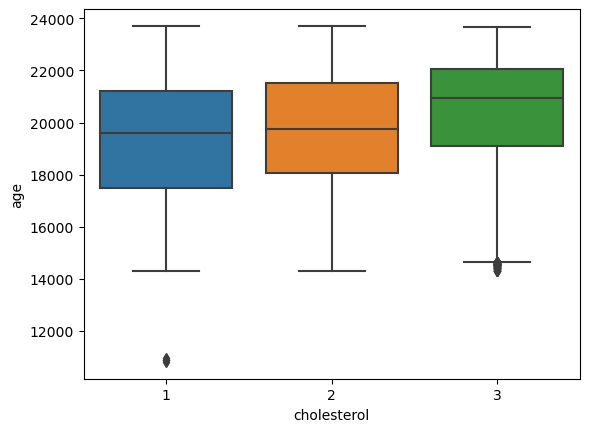

In [12]:
# Box plot of cholesterol vs. age
sns.boxplot(x='cholesterol', y='age', data=df)
plt.show()

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

ValueError: could not convert string to float: 'Hypertension Stage 1'

In [ ]:
# Example: Bar plot of gender distribution
sns.countplot(x='gender', data=df)
plt.show()

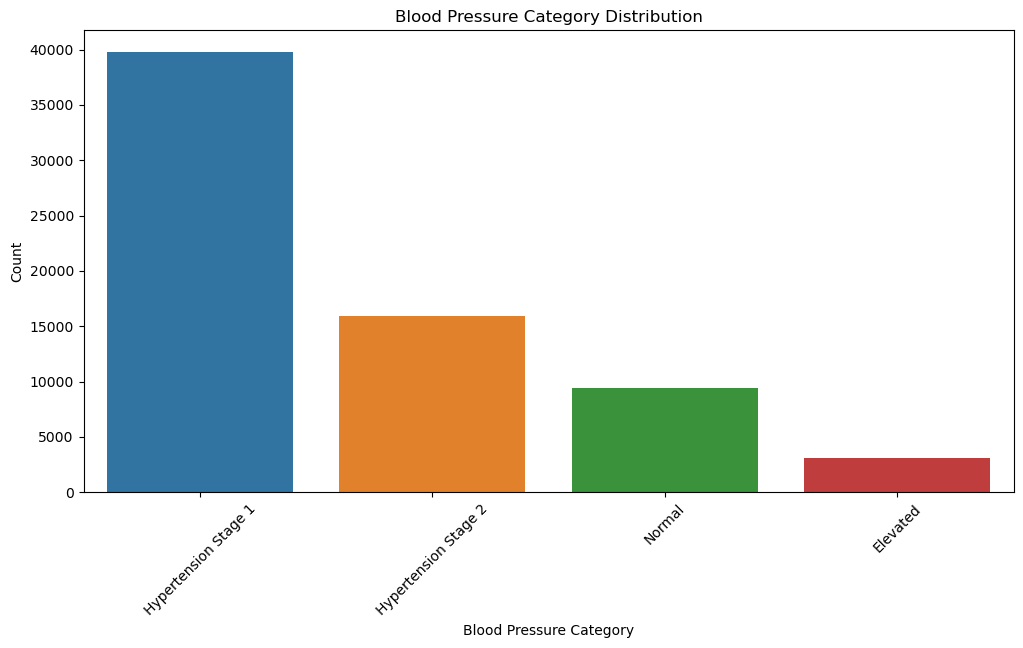

In [14]:
# Blood Pressure Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='bp_category')
plt.title('Blood Pressure Category Distribution')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='weight', ylabel='bp_category'>

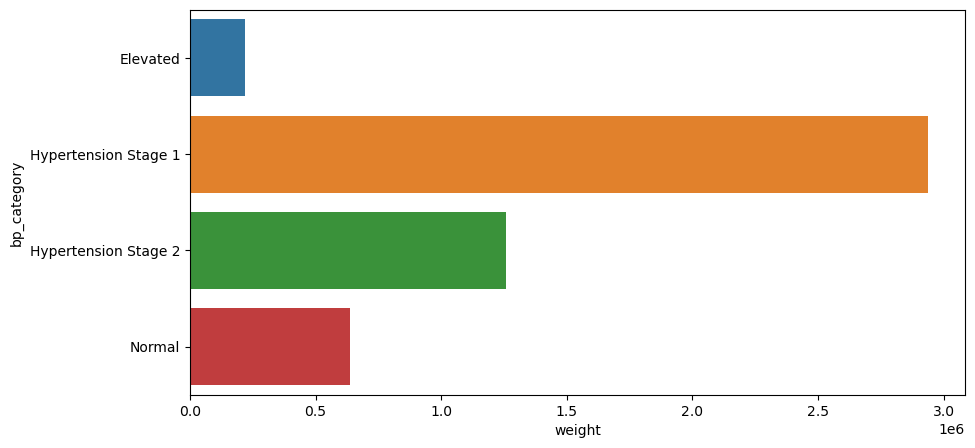

In [15]:
c = df.groupby('bp_category').sum(numeric_only=True).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=c, y='bp_category', x='weight')

Text(0, 0.5, 'Count')

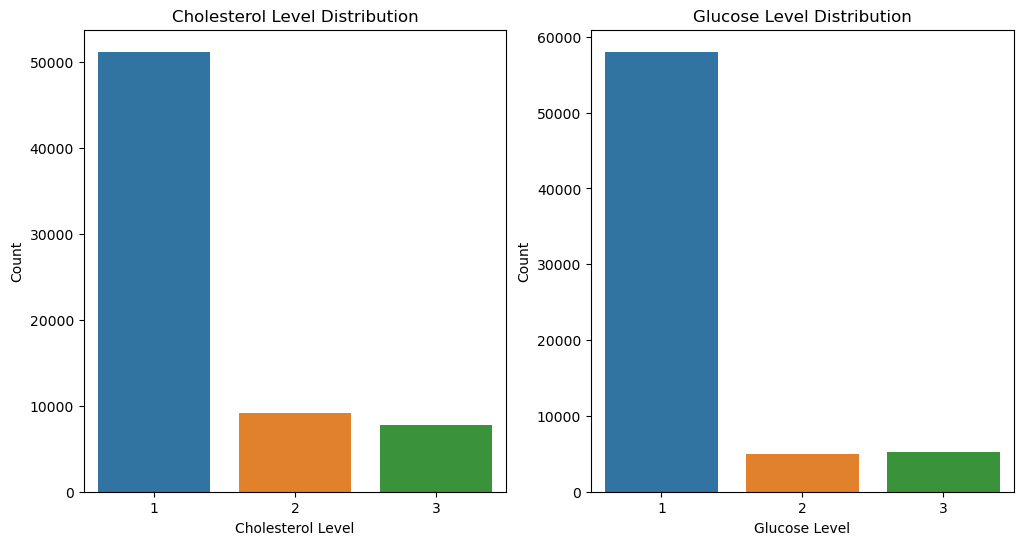

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df, x='cholesterol', ax=axes[0])
axes[0].set_title('Cholesterol Level Distribution')
axes[0].set_xlabel('Cholesterol Level')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='gluc', ax=axes[1])
axes[1].set_title('Glucose Level Distribution')
axes[1].set_xlabel('Glucose Level')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

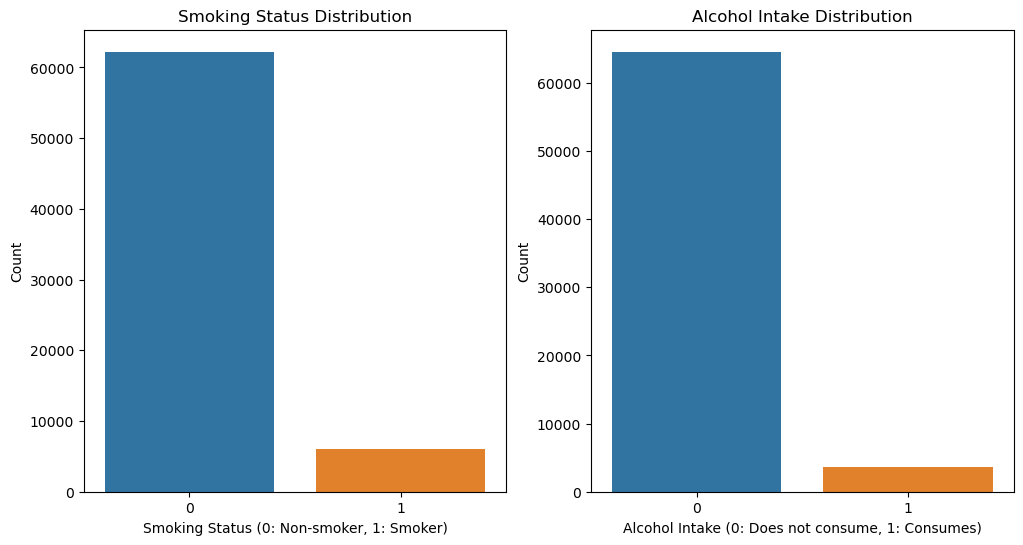

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df, x='smoke', ax=axes[0])
axes[0].set_title('Smoking Status Distribution')
axes[0].set_xlabel('Smoking Status (0: Non-smoker, 1: Smoker)')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='alco', ax=axes[1])
axes[1].set_title('Alcohol Intake Distribution')
axes[1].set_xlabel('Alcohol Intake (0: Does not consume, 1: Consumes)')
axes[1].set_ylabel('Count')

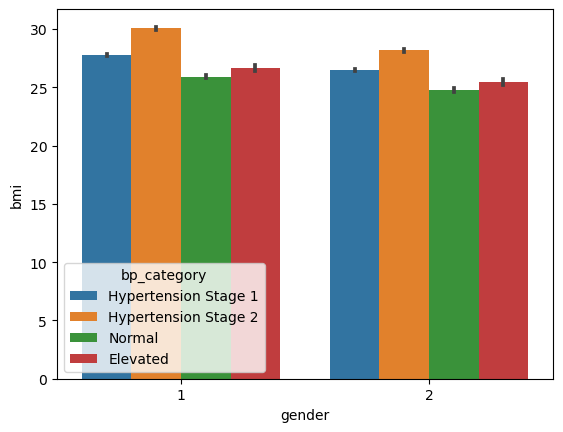

In [18]:
bar_age = sns.barplot(x = 'gender', y = 'bmi', hue = 'bp_category',data = df)

<Axes: xlabel='bp_category_encoded'>

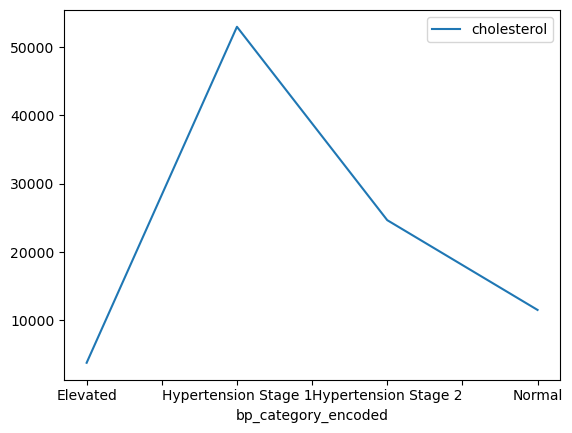

In [19]:
bmi_wise = df.groupby('bp_category_encoded').sum()[['cholesterol']]
bmi_wise.plot()

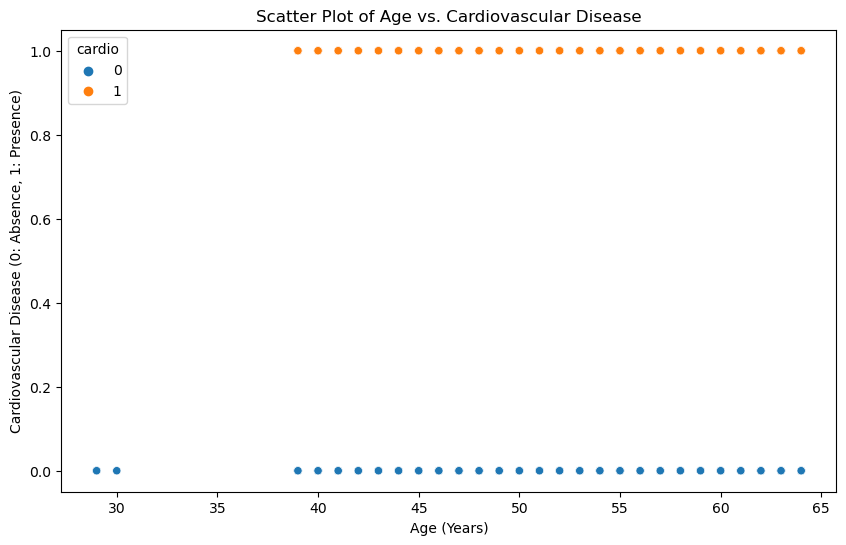

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_years', y='cardio', hue='cardio')
plt.title('Scatter Plot of Age vs. Cardiovascular Disease')
plt.xlabel('Age (Years)')
plt.ylabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.show()

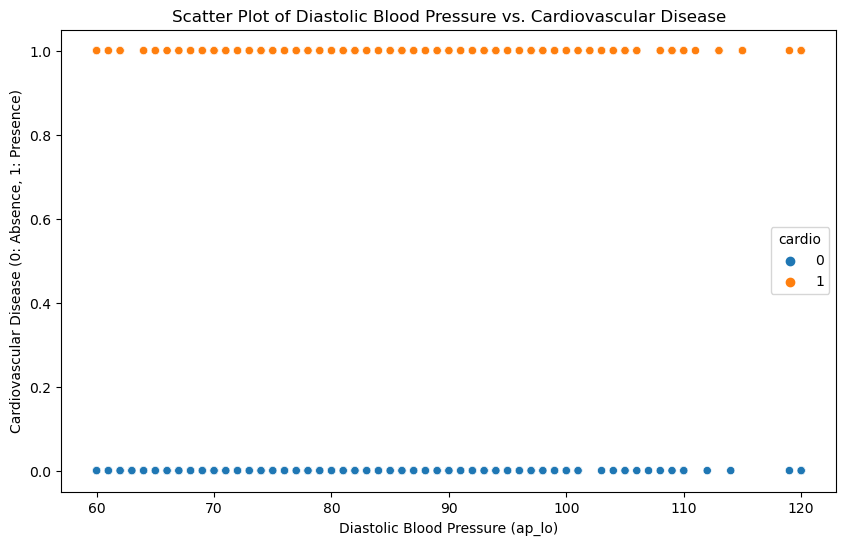

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ap_lo', y='cardio', hue='cardio')
plt.title('Scatter Plot of Diastolic Blood Pressure vs. Cardiovascular Disease')
plt.xlabel('Diastolic Blood Pressure (ap_lo)')
plt.ylabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df['bp_category'] = le.fit_transform(df['bp_category'])

In [27]:
df['bp_category_encoded'] = le.fit_transform(df['bp_category_encoded'])

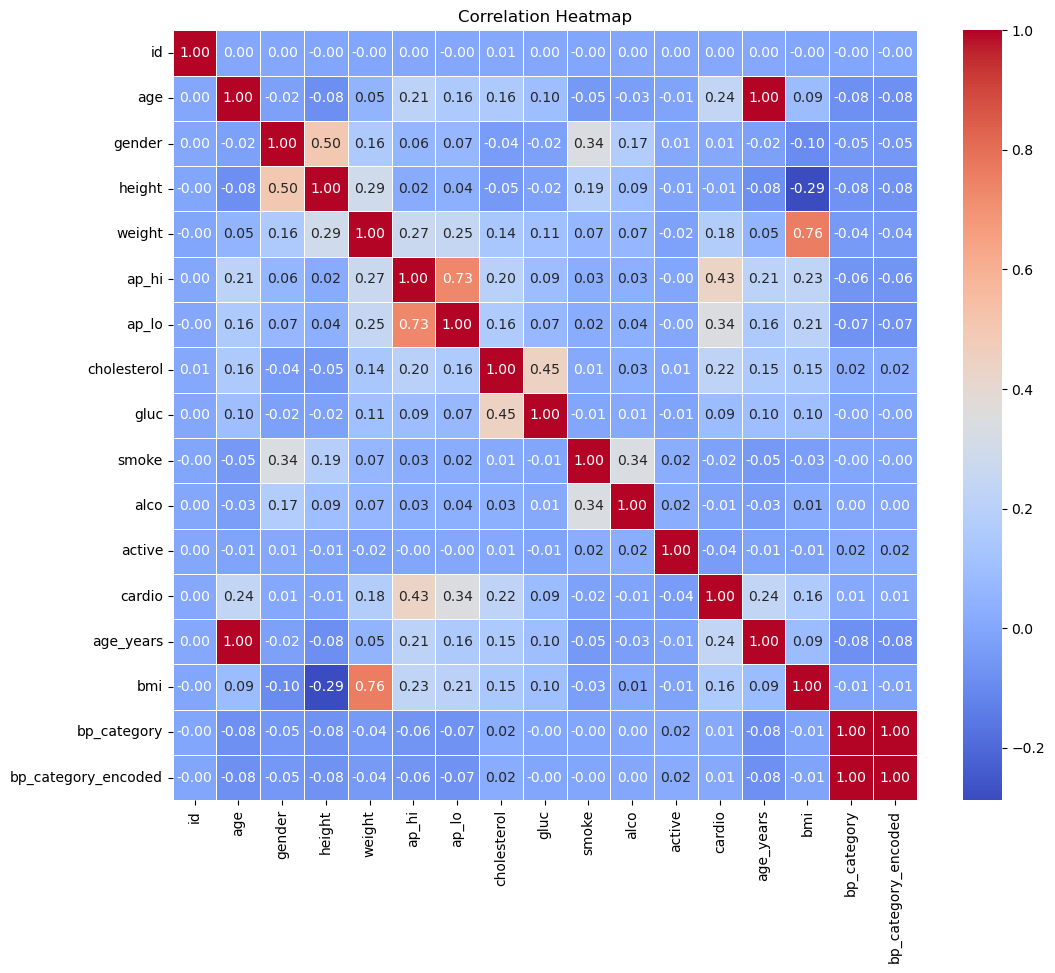

In [28]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Example: BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 39.9], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

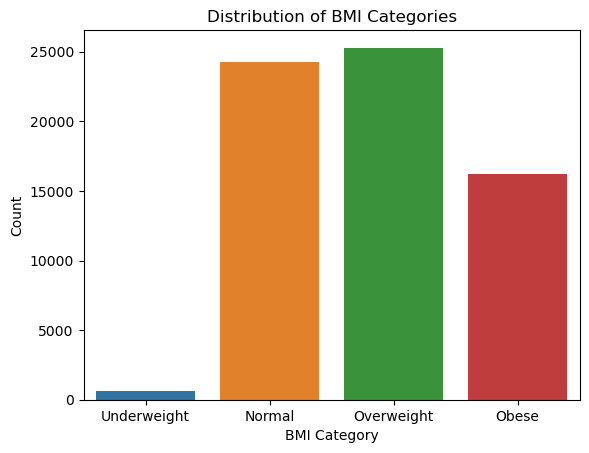

In [27]:
sns.countplot(x='bmi_category', data=df, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')
plt.show()

In [28]:
!pip install -U pandas-profiling==2.9.0

ERROR: Ignored the following versions that require a different python version: 3.3.0 Requires-Python >=3.7, <3.11; 3.4.0 Requires-Python >=3.7, <3.11; 3.5.0 Requires-Python >=3.7, <3.11; 3.6.0 Requires-Python >=3.7, <3.11; 3.6.1 Requires-Python >=3.7, <3.11; 3.6.2 Requires-Python >=3.7, <3.11; 3.6.3 Requires-Python >=3.7, <3.11; 3.6.4 Requires-Python >=3.7, <3.11; 3.6.5 Requires-Python >=3.7, <3.11; 3.6.6 Requires-Python >=3.7, <3.11
ERROR: Could not find a version that satisfies the requirement pandas-profiling==2.9.0 (from versions: 3.0.0, 3.1.0, 3.2.0)
ERROR: No matching distribution found for pandas-profiling==2.9.0


In [29]:
pp.ProfileReport(data)

NameError: name 'pp' is not defined

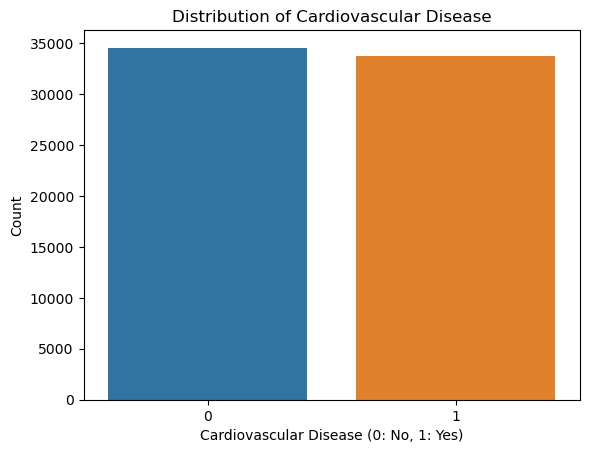

In [30]:
# Bar plot of the distribution of cardiovascular disease
sns.countplot(x='cardio', data=df)
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Cardiovascular Disease')
plt.show()

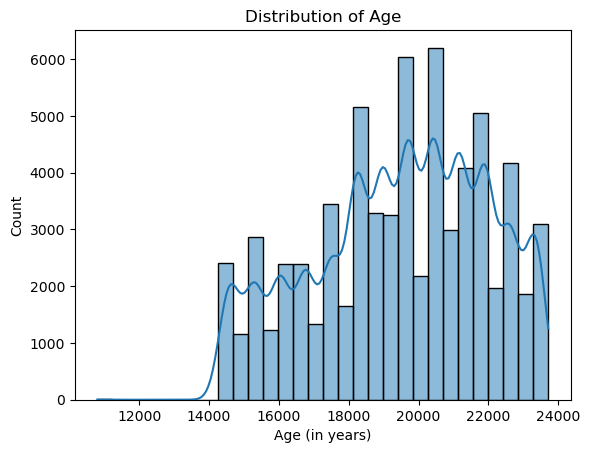

In [31]:
# Histogram of age
sns.histplot(df['age'], bins=30, kde=True)
plt.xlabel('Age (in years)')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

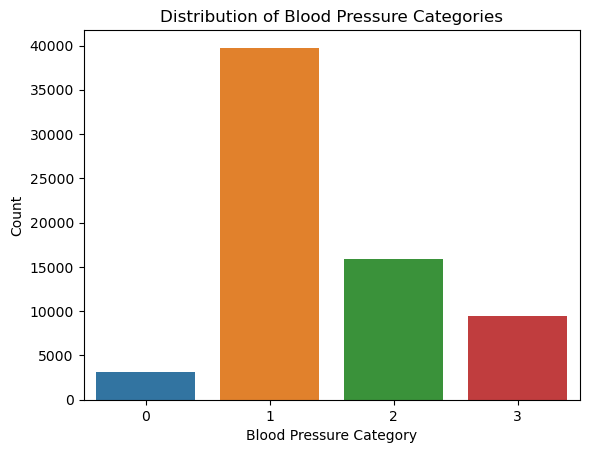

In [32]:
# Bar plot of blood pressure categories
sns.countplot(x='bp_category', data=df)
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure Categories')
plt.show()

In [33]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Normal'

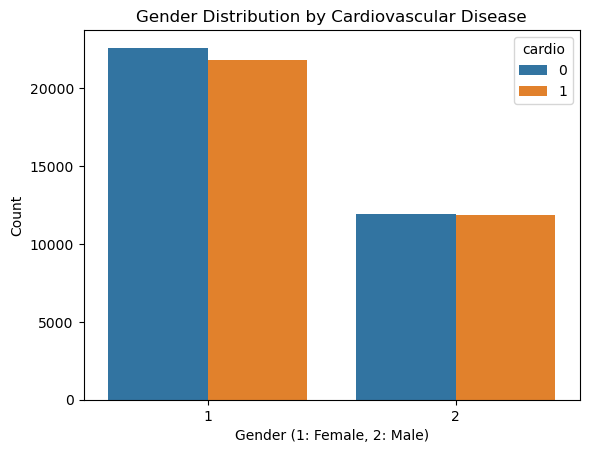

In [34]:
# Bar plot of gender distribution by cardiovascular disease
sns.countplot(x='gender', hue='cardio', data=df)
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Count')
plt.title('Gender Distribution by Cardiovascular Disease')
plt.show()

/Users/nisar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


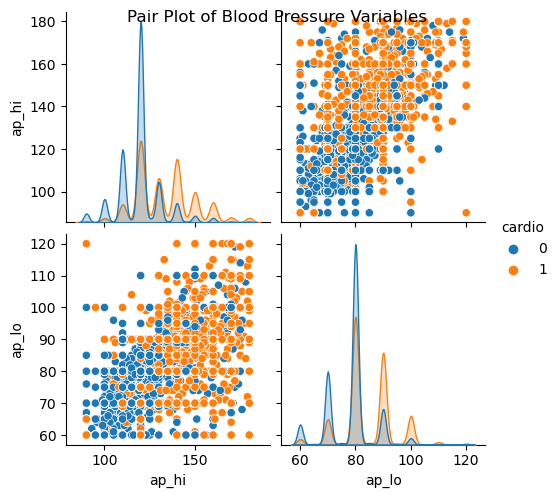

In [35]:
# Pair plot for blood pressure variables
sns.pairplot(df[['ap_hi', 'ap_lo', 'cardio']], hue='cardio')
plt.suptitle('Pair Plot of Blood Pressure Variables')
plt.show()

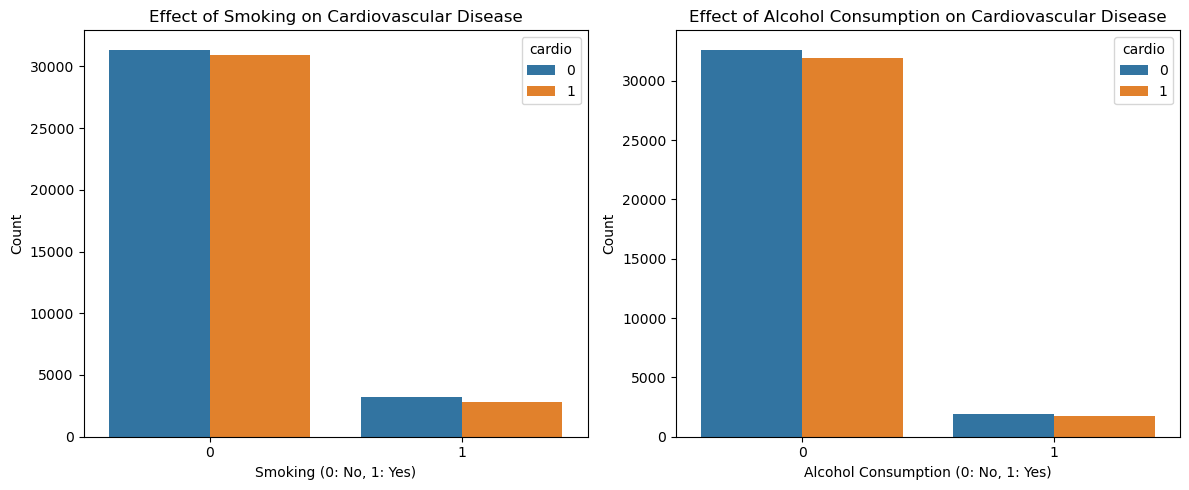

In [36]:
# Bar plot of smoking and alcohol consumption by cardiovascular disease
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x='smoke', hue='cardio', data=df, ax=axes[0])
axes[0].set_xlabel('Smoking (0: No, 1: Yes)')
axes[0].set_ylabel('Count')
axes[0].set_title('Effect of Smoking on Cardiovascular Disease')

sns.countplot(x='alco', hue='cardio', data=df, ax=axes[1])
axes[1].set_xlabel('Alcohol Consumption (0: No, 1: Yes)')
axes[1].set_ylabel('Count')
axes[1].set_title('Effect of Alcohol Consumption on Cardiovascular Disease')

plt.tight_layout()
plt.show()

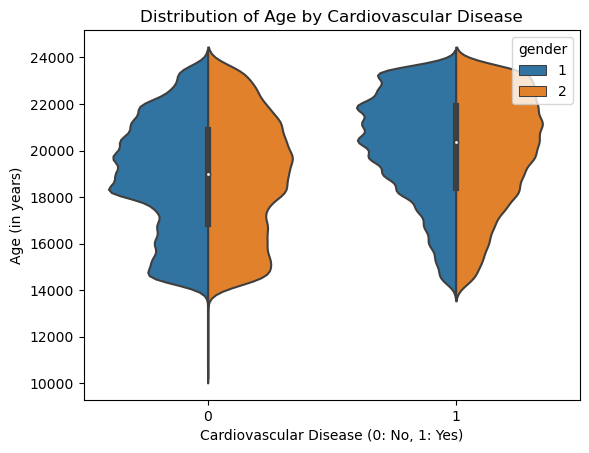

In [37]:
# Violin plot for age and cardiovascular disease
sns.violinplot(x='cardio', y='age', data=df, hue='gender', split=True)
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Age (in years)')
plt.title('Distribution of Age by Cardiovascular Disease')
plt.show()

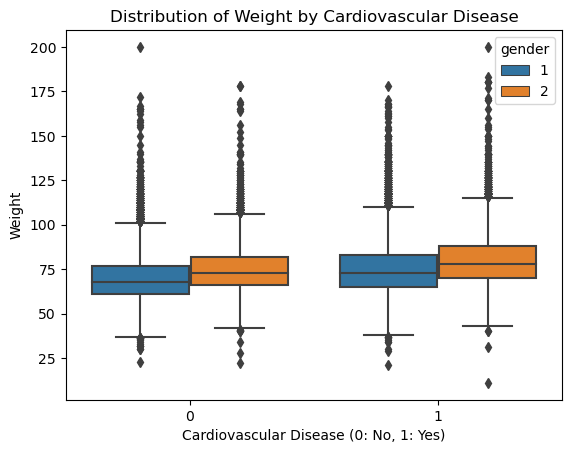

In [38]:
# Box plot for weight and cardiovascular disease
sns.boxplot(x='cardio', y='weight', data=df, hue='gender')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Weight')
plt.title('Distribution of Weight by Cardiovascular Disease')
plt.show()

/Users/nisar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


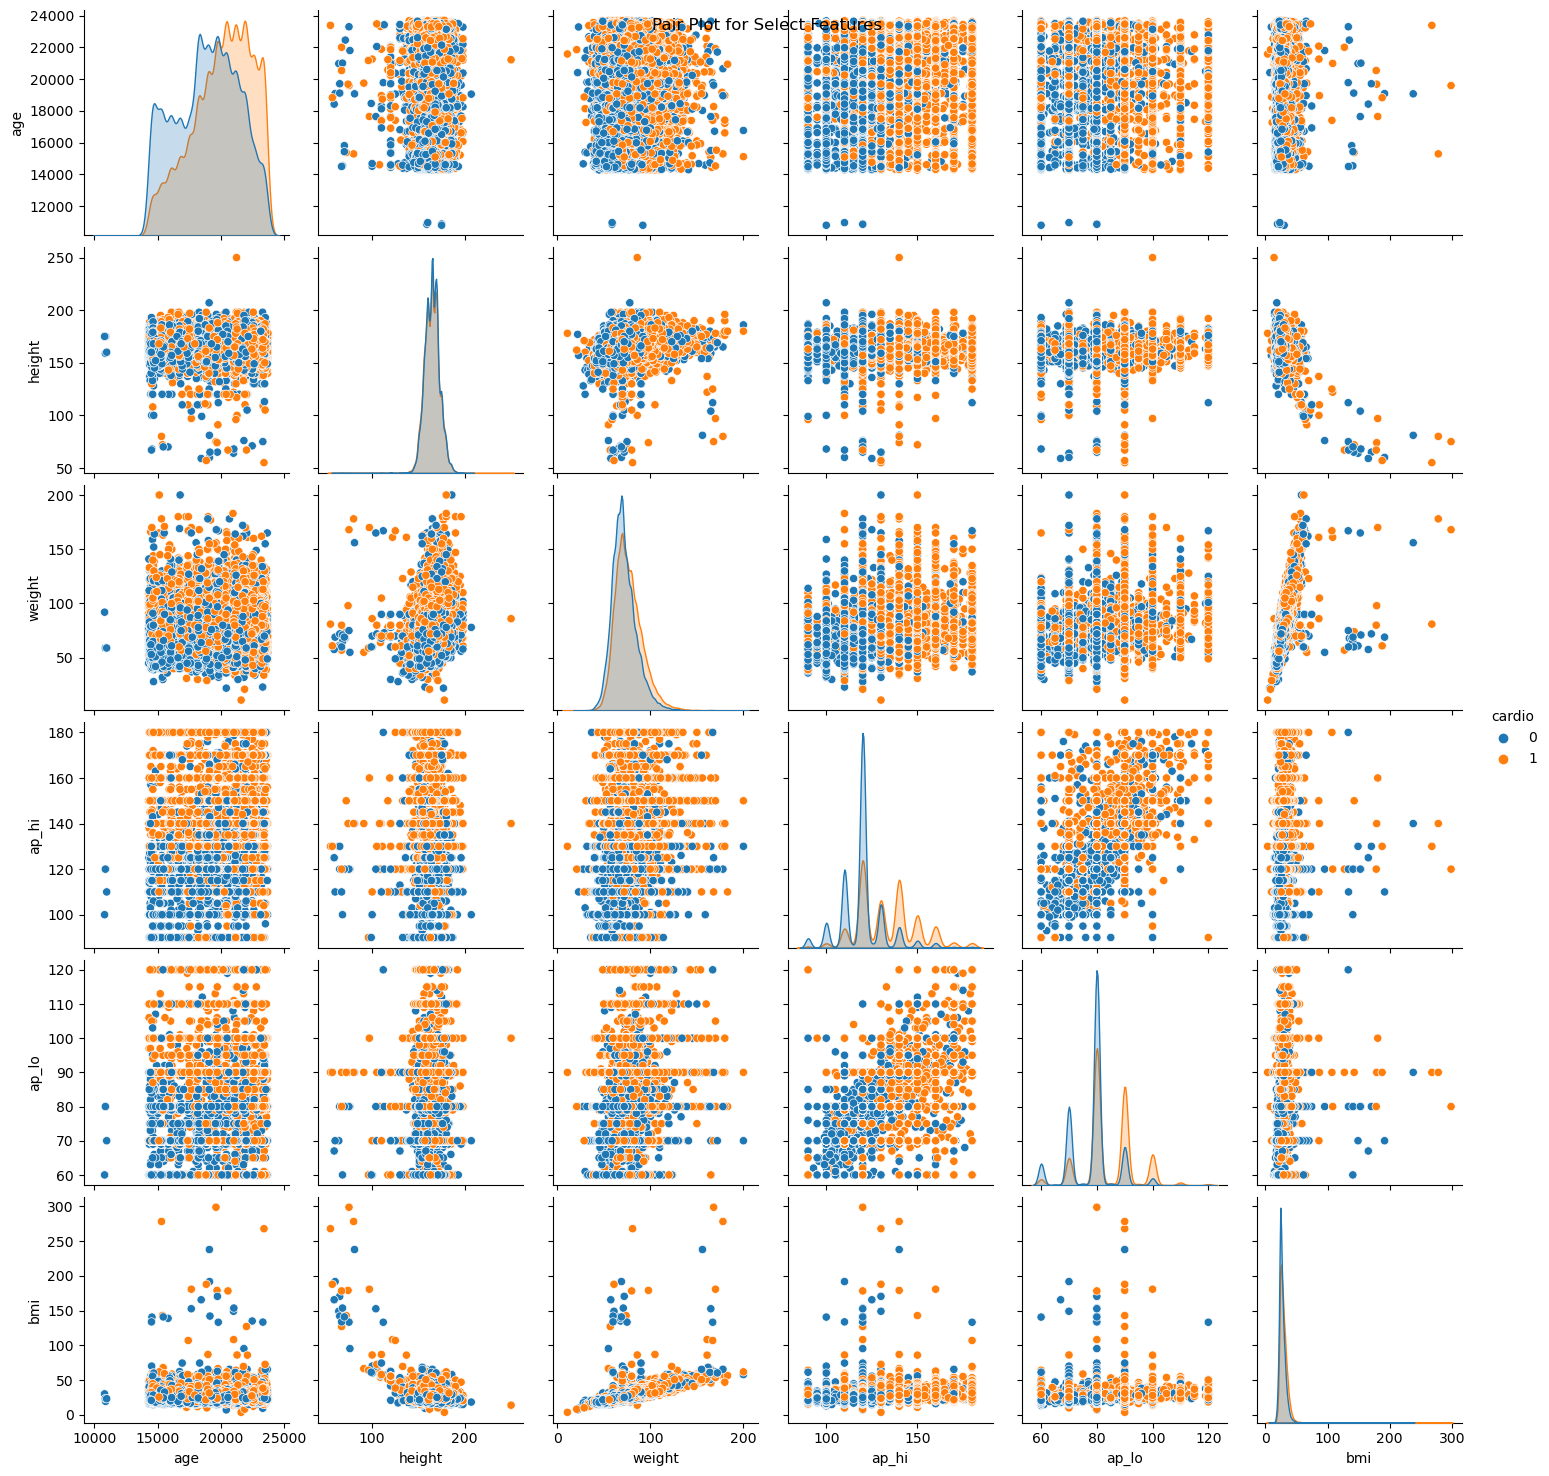

In [39]:
# Pair plot for select features
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'cardio']], hue='cardio')
plt.suptitle('Pair Plot for Select Features')
plt.show()

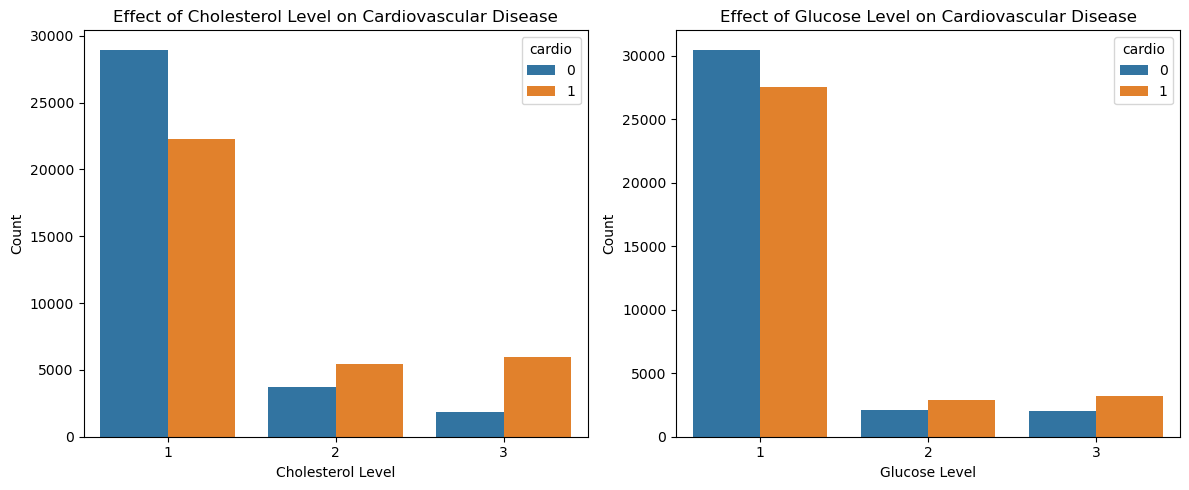

In [40]:
# Count plot for cholesterol and glucose levels
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x='cholesterol', hue='cardio', data=df, ax=axes[0])
axes[0].set_xlabel('Cholesterol Level')
axes[0].set_ylabel('Count')
axes[0].set_title('Effect of Cholesterol Level on Cardiovascular Disease')

sns.countplot(x='gluc', hue='cardio', data=df, ax=axes[1])
axes[1].set_xlabel('Glucose Level')
axes[1].set_ylabel('Count')
axes[1].set_title('Effect of Glucose Level on Cardiovascular Disease')

plt.tight_layout()
plt.show()

In [ ]:
# Facet grid for age and blood pressure variables
g = sns.FacetGrid(df, col='cardio', row='bp_category', height=3, margin_titles=True)
g.map(plt.scatter, 'age', 'ap_hi', alpha=0.5)
g.set_axis_labels('Age', 'Systolic Blood Pressure (ap_hi)')
g.set_titles(col_template="{col_name} Cardiovascular Disease", row_template="{row_name} BP Category")
plt.suptitle('Facet Grid for Age and Systolic Blood Pressure by Cardiovascular Disease and BP Category', y=1.02)
plt.show()